In [1]:
try:
    import solution
except NameError:
    raise CellExecutionError("""
    Could not import solution. Check the following: 
    1) Does your notebook run top-to-bottom (restart kernel and run all) on your local machine? Notebooks downloaded from another runtime may contain unexpected commands. 
    2) Does solution.py exist in the submit folder?
    3) Check that your notebook does not have any 'pip install' commands.
    4) Check the indentation of your notebook code if it was downloaded from Colab
    5) Run 'python solution.py' to see where it breaks. Does that help you solve it?
    """)

Looks good. You may continue :)


Metal device set to: Apple M1


2022-04-10 02:50:26.987933: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-10 02:50:26.988022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-10 02:50:27.129077: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2022-04-10 02:50:31.900628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [2]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import os
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

# Key variables
X_train = solution.X_train
y_train = solution.y_train
class_names = solution.class_names

### Machine Learning Engineering - Assignment 3

In [3]:
print("Name:",solution.your_name)

Name: Hu, Rucihen


#### Answer 1.1 (15p)

 Model works well with 100% ACC on validation set. 3 hidden layers guarantees sufficient training. Small #epoch, l2 regularization, dropout, small initial dense layer and shallow network reduce overfitting. Deeper layer has increased #filters to preserve input information. Batch normalization doesn't work well, leading to high variance and loss. Max pooling accelerates training. Zero padding has no obvious impact, perhaps due to shallow CovNet. Even filter size leads to distortion. Larger filter size takes longer training time while score is similar.  (length: 558)

Max val score: 100.00%


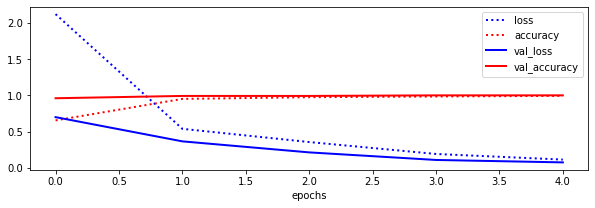

Model: "sequential_6"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d_12 (Conv2D)          (None, 158, 158, 32)      896       


 max_pooling2d_12 (MaxPoolin  (None, 79, 79, 32)       0         


 g2D)                                                            


 dropout_12 (Dropout)        (None, 79, 79, 32)        0         


 conv2d_13 (Conv2D)          (None, 77, 77, 64)        18496     


 max_pooling2d_13 (MaxPoolin  (None, 38, 38, 64)       0         


 g2D)                                                            


 dropout_13 (Dropout)        (None, 38, 38, 64)        0         


 conv2d_14 (Conv2D)          (None, 36, 36, 128)       73856     


 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 128)      0         


 g2D)                                                            


 dropout_14 (Dropout)        (None, 18, 18, 128)       0         


 flatten_4 (Flatten)         (None, 41472)             0         


 dense_12 (Dense)            (None, 128)               5308544   


 dense_13 (Dense)            (None, 3)                 387       


Total params: 5,402,179


Trainable params: 5,402,179


Non-trainable params: 0


_________________________________________________________________


None


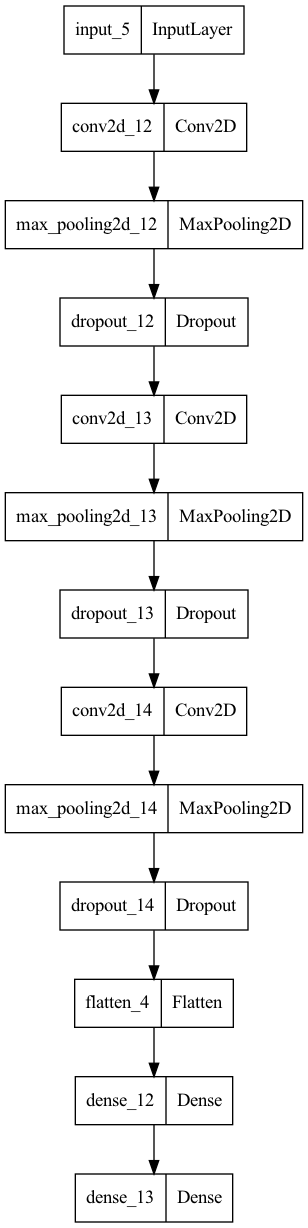

In [4]:
from IPython.display import Image
solution.print_answer(solution.answer_q_1_1)
solution.run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, 
                        solution.base_dir, train=False, epochs=3, batch_size=32)
if os.path.exists(os.path.join(solution.base_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.base_dir,'model_1_1.png'), width=200))

#### Answer 1.2 (15p)

 Rotation and vertical flip are not used because the hands in the images are towards upwards. Because in some images the hands are not in the exactly center, so the generated hand images need to move around a bit by using width shift and height shift with small parameter values. As the size of the hands in the image set varies, zooming is used. Shear is used to simulate the situation that some pictures of hands are not taken from the exactly front side. The model performs very well: it achieves a high validation score 100% within a small number of epochs.  (length: 563)

Max val score: 100.00%


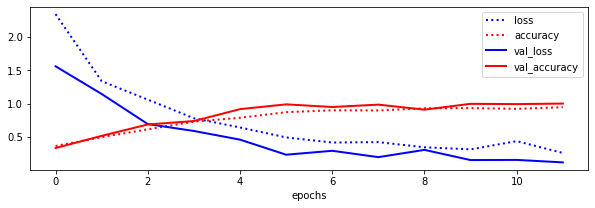

Model: "sequential_23"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d_63 (Conv2D)          (None, 158, 158, 32)      896       


 max_pooling2d_63 (MaxPoolin  (None, 79, 79, 32)       0         


 g2D)                                                            


 dropout_63 (Dropout)        (None, 79, 79, 32)        0         


 conv2d_64 (Conv2D)          (None, 77, 77, 64)        18496     


 max_pooling2d_64 (MaxPoolin  (None, 38, 38, 64)       0         


 g2D)                                                            


 dropout_64 (Dropout)        (None, 38, 38, 64)        0         


 conv2d_65 (Conv2D)          (None, 36, 36, 128)       73856     


 max_pooling2d_65 (MaxPoolin  (None, 18, 18, 128)      0         


 g2D)                                                            


 dropout_65 (Dropout)        (None, 18, 18, 128)       0         


 flatten_21 (Flatten)        (None, 41472)             0         


 dense_46 (Dense)            (None, 128)               5308544   


 dense_47 (Dense)            (None, 3)                 387       


Total params: 5,402,179


Trainable params: 5,402,179


Non-trainable params: 0


_________________________________________________________________


None


In [5]:
solution.print_answer(solution.answer_q_1_2)
solution.run_evaluation("model_1_2", solution.build_model_1_2, solution.augment_data(), 
                        solution.base_dir, train=False, generator=True, epochs=3, batch_size=32)

#### Answer 2.1 (5p)

In [6]:
print("Test accuracy:", solution.evaluate_model())

2022-04-10 02:50:35.508918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test accuracy: 0.9596774193548387


#### Answer 2.2 (20p)

2022-04-10 02:50:36.634067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2022-04-10 02:50:37.350670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[class 'rock']: 
All images of 'rock' are predicted correctly!
[class 'paper']: 


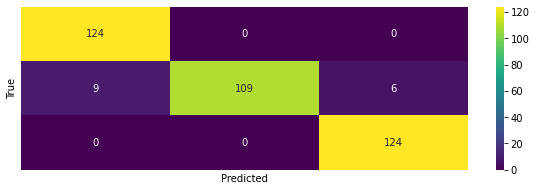

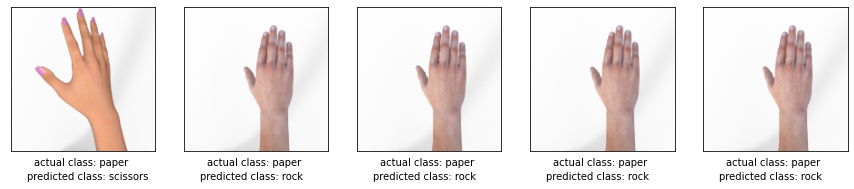

[class 'scissors']: 
All images of 'scissors' are predicted correctly!
 Class 'paper' is the most confused one. Model achieves 100% ACC on the other two classes. In 'paper', some images are hard to distinguish as they weren't taken from the exactly front side and fingers are not close together. It adds noises to test set. Model may focus more on fingers and classifies them to 'scissors'. Model also recognizes some 'paper' as 'rock', may due to palm takes more space than fingers. There are some similar or almost duplicated images in data set. If the model misclassifies one, then predictions for all the others are also wrong.  (length: 562)



In [7]:
solution.plot_confusion_matrix()
solution.plot_misclassifications()
solution.print_answer(solution.answer_q_2)

#### Answer 3.1 (25p)

Max val score: 98.02%


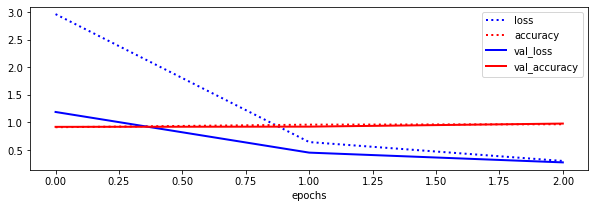

Model: "sequential_38"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   


 ional)                                                          


 global_average_pooling2d_34  (None, 1280)             0         


  (GlobalAveragePooling2D)                                       


 dense_100 (Dense)           (None, 32)                40992     


 dense_101 (Dense)           (None, 3)                 99        


Total params: 2,299,075


Trainable params: 927,171


Non-trainable params: 1,371,904


_________________________________________________________________


None


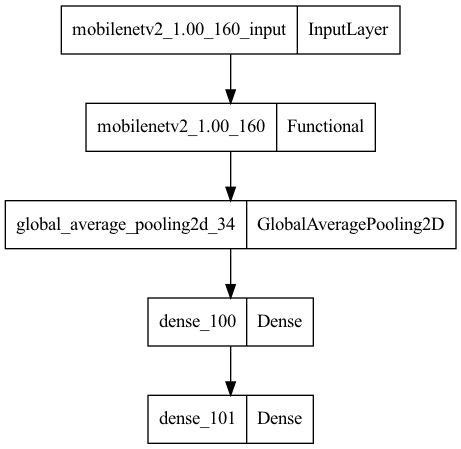

0.956989247311828


In [8]:
solution.run_evaluation("model_3_1", solution.build_model_3_1, solution.augment_data(), 
                        solution.base_dir, train=False, generator=True, epochs=3, batch_size=32)
if os.path.exists(os.path.join(solution.base_dir,'model_3_1.png')):
    display(Image(os.path.join(solution.base_dir,'model_3_1.png'), width=200))
    
print(solution.test_accuracy_3_1)

#### Answer 3.2 (20p)

2022-04-10 02:50:40.390625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 When dimension is reduced to 2D, TSNE map clearly shows three classes are clustered correctly with only few misclassifications. The transfered model is a good foundation and very powerful, thus shallow and simple successive ConvNet is appended to avoid overkill and overfit. The model predicts accurately with the test score 0.957. The incorrect predictions appear in 'scissors', in which some points are classified as 'paper'. It might be that those images are hard to distinguish, and the model cannot learn the pattern from them.  (length: 535)



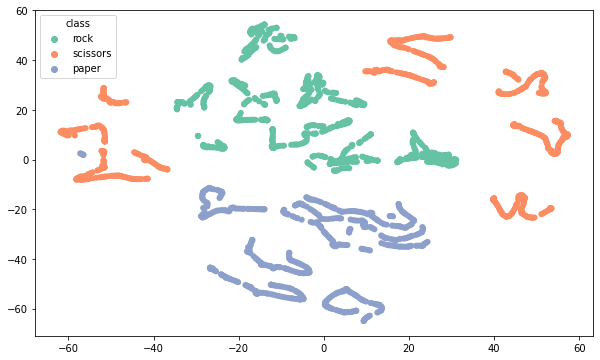

In [9]:
dn_embs = solution.create_embeddings("model_3_1")
d2_embs = solution.compute_tsne(dn_embs)
solution.plot_tsne(d2_embs, solution.y_train)
solution.print_answer(solution.answer_q_3)

In [10]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("tensorflow version: {0}".format(solution.tensorflow_version))

Running time: 21.66 seconds
Last modified: April 10, 2022
tensorflow version: 2.8.0
